In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter



In [2]:
def read_data(filename='./data/seeds_dataset.txt'):
    """
    Load the dataset from the filepath.
    
    Parameters
    ----------
    filename - string
    
    Returns
    -------
    data - numpy array of floats
    labels - numpy array of integers
    """
    feats = []
    labels = []
    with open(filename, 'r') as f:
        for line in f:
            line = line.strip().replace('\t\t','\t').split('\t')
            f1, f2, f3, f4, f5, f6, f7, label = float(line[0]), float(line[1]), \
                                                float(line[2]), float(line[3]), \
                                                float(line[4]), float(line[5]), \
                                                float(line[6]), int(line[7])
            feats.append([f1, f2, f3, f4, f5, f6, f7])
            labels.append(label)
    return np.array(feats), np.array(labels)


In [3]:
def std_scaler(feats):
    """
    
    """
    f_mean = np.mean(feats, axis=0)
    f_std = np.std(feats, axis=0)
    
    feats_scaled = (feats - f_mean)/f_std
    return feats_scaled


In [75]:
def train_test_split(X, y, test_size=0.2, random_state=21):
    """
    Split the dataset into train and test splits.
    
    Parameters:
    X (numpy.ndarray): Input features array.
    y (numpy.ndarray): Target variable array.
    test_size (float, optional): The proportion of the dataset to include in the test split (default: 0.2).
    random_state (int, optional): Seed value for random number generation (default: 21).
    
    Returns:
    X_train (numpy.ndarray): Training set input features.
    y_train (numpy.ndarray): Training set target variable.
    X_test (numpy.ndarray): Test set input features.
    y_test (numpy.ndarray): Test set target variable.
    """
    
    # Set the seed for reproducibility
    np.random.seed(random_state)
    
    # Shuffle the dataset indices
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    # Calculate the index to split the dataset
    split_index = int((1 - test_size) * X.shape[0])
    
    # Split the dataset into train and test sets
    X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
    y_train, y_test = y[indices[:split_index]], y[indices[split_index:]]
    
    return X_train, y_train, X_test, y_test, indices[:split_index]


In [5]:
# Distance function (cartesian distance)
def cartesian_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# # Clustering function (Hierarchical Clustering)
def hierarchical_clustering(data, num_clusters):
    n = data.shape[0]
    distances = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            distances[i, j] = cartesian_distance(data[i], data[j])

    clusters = [[i] for i in range(n)]

    while len(clusters) > num_clusters:
        min_distance = np.inf
        merge_indices = (0, 0)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster1 = clusters[i]
                cluster2 = clusters[j]
                distance = max(distances[c1, c2] for c1 in cluster1 for c2 in cluster2)

                if distance < min_distance:
                    min_distance = distance
                    merge_indices = (i, j)

        merged_cluster = clusters[merge_indices[0]] + clusters[merge_indices[1]]
        del clusters[merge_indices[1]]
        del clusters[merge_indices[0]]
        clusters.append(merged_cluster)

    return clusters


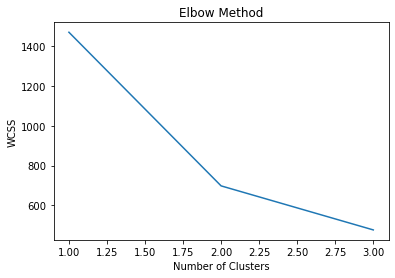

In [88]:
def calculate_wcss(clusters, data):
    wcss = 0
    for cluster in clusters:
        cluster_data = data[cluster]
        centroid = np.mean(cluster_data, axis=0)
        wcss += np.sum((cluster_data - centroid) ** 2)

    return wcss

# Determine optimal number of clusters
max_clusters = 3
wcss_values = []

## load the dataset
feats, labels = read_data()
feats = std_scaler(feats)

for num_clusters in range(1, max_clusters + 1):
    clusters = hierarchical_clustering(feats, num_clusters)
    wcss = calculate_wcss(clusters, feats)
    wcss_values.append(wcss)

# Plot the WCSS values
plt.plot(range(1, max_clusters + 1), wcss_values)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()




In [116]:
# Distance function (cartesian distance)
def cartesian_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Define the KNN classifier
def knn_classify(test_instance, training_data, training_labels, k):
    distances = []

    for i, instance in enumerate(training_data):
        distance = cartesian_distance(test_instance, instance)
        distances.append((distance, training_labels[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    labels = [neighbor[1] for neighbor in neighbors]
    most_common = Counter(labels).most_common(1)
    return most_common[0][0]

X_train, y_train, X_test, y_test, train_ind = train_test_split(feats, labels)

test_ind = np.array([i for i in range(len(feats)) if i not in train_ind])

# Classify test instances using KNN
test_instance = X_test[0]  # Replace with your test instance
k = 3  # Replace with the desired value of k

# Assign cluster IDs as labels for training data
training_labels = np.zeros(len(labels))

for i, cluster in enumerate(clusters):
    for point_index in cluster:
        training_labels[point_index] = i + 1
        
y_train_cluster = training_labels[train_ind]
y_test_cluster = training_labels[test_ind]

pred_test = []
for inst in X_test:
    # Classify the test instance
    predicted_label = knn_classify(inst, X_train, y_train_cluster, k)
    pred_test.append(predicted_label)

    
print(np.mean(pred_test == y_test))

0.9523809523809523


In [115]:
np.array(pred_test)

array([2., 2., 1., 2., 2., 1., 2., 1., 3., 3., 1., 2., 1., 1., 3., 1., 1.,
       2., 3., 3., 2., 3., 3., 2., 2., 3., 2., 3., 3., 3., 2., 2., 2., 3.,
       3., 2., 2., 1., 1., 1., 3., 3.])

In [113]:
np.array(pred_test)

array([2., 2., 1., 2., 2., 1., 2., 1., 3., 3., 1., 2., 1., 1., 3., 1., 1.,
       2., 3., 3., 2., 3., 3., 2., 1., 3., 2., 3., 3., 3., 2., 2., 2., 3.,
       3., 2., 2., 1., 1., 1., 3., 3.])

In [61]:
training_labels

array([ 8.,  3.,  3.,  3.,  3.,  3.,  3.,  3., 10.,  8.,  8.,  3.,  1.,
        3.,  3.,  1.,  1.,  3.,  3.,  9.,  8.,  3.,  3.,  5.,  8.,  3.,
        9.,  9.,  3.,  9.,  5.,  8.,  8.,  3.,  8.,  8.,  8.,  8.,  3.,
        1.,  3.,  3.,  5., 10.,  8.,  3.,  3.,  3.,  3.,  8.,  8.,  1.,
        8.,  3.,  8.,  8.,  3.,  3.,  3.,  5.,  5.,  5.,  5.,  9.,  5.,
        5.,  8.,  3.,  8.,  9.,  7., 10., 10., 10., 10., 10., 10.,  7.,
        7.,  8., 10.,  6.,  6.,  7.,  7., 10., 10.,  7.,  6.,  6.,  7.,
       10., 10.,  6.,  7., 10.,  7.,  7.,  7., 10., 10., 10., 10.,  7.,
       10., 10., 10., 10.,  7., 10., 10.,  7., 10.,  6.,  7., 10., 10.,
       10., 10.,  7.,  6., 10., 10., 10.,  8., 10.,  7., 10.,  7.,  6.,
       10., 10., 10., 10., 10.,  8., 10., 10., 10.,  8.,  9.,  4.,  4.,
        9.,  2.,  2.,  9.,  9.,  9.,  2.,  9.,  2.,  9.,  9.,  2.,  2.,
        9.,  2.,  2.,  2.,  9.,  9.,  9.,  9.,  4.,  5.,  9.,  9.,  2.,
        9.,  2.,  4.,  2.,  2.,  2.,  9.,  2.,  2.,  4.,  9.,  9